**Восстановление смеси плотностей распределений.**

алгоритм EM 

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

n_samples = 500
n_comp = 5 # количество компонент

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_comp,  
        cluster_std=rng.uniform(size=(n_comp))+.7 # [1.0, 1.5, 1.5, ]
    )

X.shape

(500, 2)

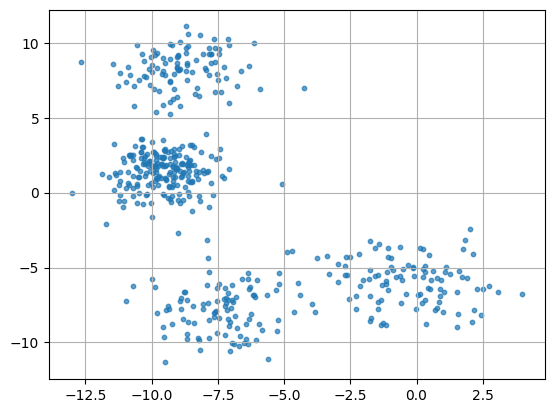

In [3]:
plt.scatter( X[:,0], X[:,1],s=10,alpha=0.7)
plt.grid()
plt.show()

фунция n-мерной нормальной плотности распределения
$$
\varphi(x;\theta)
=\mathcal{N}(x;\Sigma,\mu)
=\frac{ \exp\left( -\frac{1}{2}(x-\mu)^T \cdot \Sigma^{-1} \cdot (x-\mu) \right)  }
      { \sqrt{ (2\pi)^n \det \Sigma } }
$$

In [4]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=n_comp).fit(X)
p = model.predict(X)

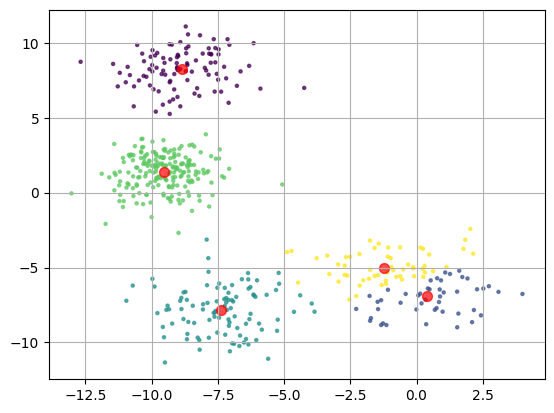

In [5]:
plt.scatter( X[:,0], X[:,1],s=5,alpha=0.7,c=p)
plt.scatter( model.means_[:,0], model.means_[:,1],s=50,alpha=0.7,c='r')
plt.grid()
plt.show()

In [6]:
# model.score_samples(X)

-4.691987026929845

(-12.24925908726282, -2.99301824402945, 1.1766478982040625)

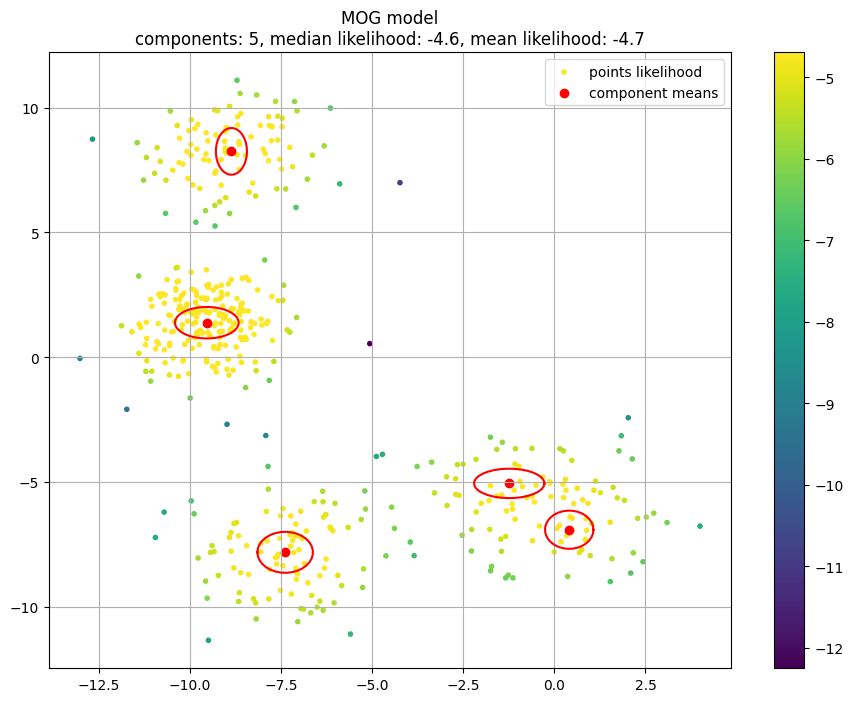

In [7]:
from sklearn.preprocessing import MinMaxScaler

p = model.score_samples(X)
mu = model.means_
sigma = model.covariances_
display( p.mean() ) # среднее правдоподобие
display( ( p.min(),p.max(),p.std()) )

#p = MinMaxScaler(feature_range=(0,1),).fit_transform(p.reshape(-1,1))

p_norm = p.copy()
p_norm_mean = p_norm.mean()
p_norm[p_norm>p_norm_mean] = p_norm_mean

fig, ax = plt.subplots(figsize=(11,8))
pp = ax.scatter( x=X[:,0], y=X[:,1], marker='.', c=p_norm, label='points likelihood' )
ax.scatter( x=mu[:,0], y=mu[:,1], marker='o', c='r',label='component means' )

# рисуем проекции гауссиан

# окружность радиуса 1. в полярных координатах
alpha = np.linspace(0.,2.,32)*np.pi 
# конвертируем полярные в декартовы 
coo = np.array([ np.cos(alpha), np.sin(alpha) ])

for n in range(len(mu)):
    sigma_ = sigma[n] # матрица ковариаций
    mu_ = mu[n].reshape(-1,1) # мат.ожидание
    # собственным векторы и числа матрицы ковариации
    evalues, evectors = np.linalg.eig(sigma_) 
    v = (evalues*evectors.sum(axis=1)).reshape(-1,1)
    ndim = mu_.shape[1]
    a = 1./np.sqrt( ((2.*np.pi)**ndim)*np.linalg.det(sigma_) )*2
    el_ = coo*v*a+mu_

    ax.plot( el_[0,:] , el_[1,:], c='r'  ) 
    

ax.set_title(f'MOG model\ncomponents: {len(mu)}, median likelihood: {np.median(p):.2}, mean likelihood: {p.mean():.2}')
ax.grid()
ax.legend()
fig.colorbar(pp,ax=ax)
